The Bayes error is the probability that we will misclassify. Assume that there are equally many beans of each type (no prior).

a. For a given T write down the theoretical expression (in terms of integrals) for the probability that you will classify a point as bean type A when it is bean type B and similarly that it is bean type B when it is bean type A.

b. In python just using numerical functions (you can take 1000 data points from min of weight x=1 to x=8) compute the theoretical probabilities from part a. Use matplotlib to make a curves showing the probability of classifying something class A (
 )assuming it is really class B 
, in other words 
 is the figure y-axis, as a function of 
, the figure x-axis. Similarly plot 
 as a function of 
. Putting these together since 
, adding the curves and dividing by 2 you get the probability of miss-classification or Bayes error as a function of 
. Plot that as well.

c. Use the numpy random.randn to simulate 10000 data points, 5,000 from bean type A and 5,000 from bean type B. You can now pick 1000 values of 
 using linspace between 
 and 
. For each of these you can compute the miss classification rate. Make the figure. These should match closely your results for 
 above.

This problem should be a Jupyter notebook with markdown explaining each of your steps. In all cases seed your random numbers for reproducibility.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Setting seed for reproducibility

In [2]:
np.random.seed(42)

In [3]:
# Parameters for bean type A
mu_A = 5
sigma_A = 2

In [4]:
# Parameters for bean type B
mu_B = 4
sigma_B = 1.4

###  Define the probability density function for bean type A

In [5]:
def pdf_A(x):
    return (1 / (np.sqrt(2 * np.pi) * sigma_A)) * np.exp(-((x - mu_A)**2) / (2 * sigma_A**2))

### Define the probability density function for bean type B

In [6]:
def pdf_B(x):
    return (1 / (np.sqrt(2 * np.pi) * sigma_B)) * np.exp(-((x - mu_B)**2) / (2 * sigma_B**2))

### Define the classification threshold

In [7]:
def classifier(x, threshold):
    return 1 * (x >= threshold)

In [8]:
# Theoretical expression for misclassification probabilities

def misclassification_probs(threshold):
    prob_A_misclassified_as_B = np.trapz(pdf_A(np.linspace(1, threshold, 1000)), dx=0.01)
    prob_B_misclassified_as_A = np.trapz(pdf_B(np.linspace(threshold, 8, 1000)), dx=0.01)
    return prob_A_misclassified_as_B, prob_B_misclassified_as_A

In [9]:
# Compute misclassification probabilities for different thresholds

threshold_values = np.linspace(1, 8, 100)
prob_A_misclassified_as_B_values = []
prob_B_misclassified_as_A_values = []

for threshold in threshold_values:
    prob_A_misclassified_as_B, prob_B_misclassified_as_A = misclassification_probs(threshold)
    prob_A_misclassified_as_B_values.append(prob_A_misclassified_as_B)
    prob_B_misclassified_as_A_values.append(prob_B_misclassified_as_A)

Use the numpy random.randn to simulate 10000 data points, 5,000 from bean type A and 5,000 from bean type B. You can now pick 1000 values of 
 using linspace between 
 and 
. For each of these you can compute the miss classification rate. Make the figure. These should match closely your results for 
 above.

### Computing Bayes error

In [ ]:
bayes_error_values = (np.array(prob_A_misclassified_as_B_values) + np.array(prob_B_misclassified_as_A_values)) / 2

In [11]:
# Simulate data points

num_samples = 10000
num_samples_per_type = num_samples // 2
data_A = mu_A + sigma_A * np.random.randn(num_samples_per_type)
data_B = mu_B + sigma_B * np.random.randn(num_samples_per_type)

In [12]:
# Define function to compute misclassification rate
def compute_misclassification_rate(data_A, data_B, threshold):
    misclassified_A_as_B = np.sum(data_A < threshold)
    misclassified_B_as_A = np.sum(data_B >= threshold)
    total_misclassified = misclassified_A_as_B + misclassified_B_as_A
    return total_misclassified / num_samples

# Compute misclassification rates for different thresholds
misclassification_rates = [compute_misclassification_rate(data_A, data_B, threshold) for threshold in threshold_values]


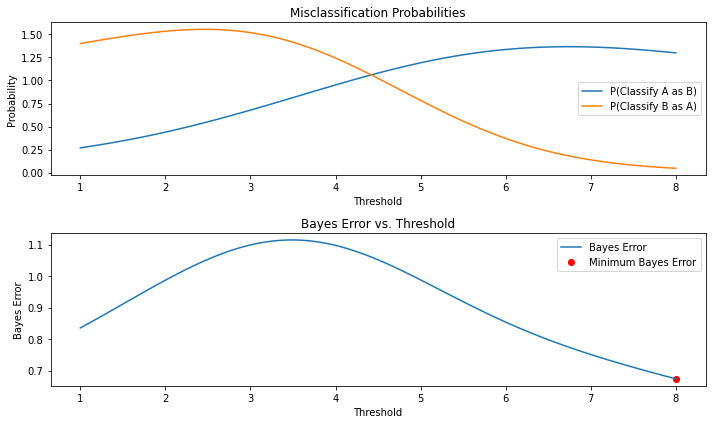

In [15]:
# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(threshold_values, prob_A_misclassified_as_B_values, label='P(Classify A as B)')
plt.plot(threshold_values, prob_B_misclassified_as_A_values, label='P(Classify B as A)')
plt.xlabel('Threshold')
plt.ylabel('Probability')
plt.title('Misclassification Probabilities')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(threshold_values, bayes_error_values, label='Bayes Error')
plt.scatter(threshold_values[np.argmin(bayes_error_values)], np.min(bayes_error_values), color='red', label='Minimum Bayes Error')
plt.xlabel('Threshold')
plt.ylabel('Bayes Error')
plt.title('Bayes Error vs. Threshold')
plt.legend()

plt.tight_layout()
plt.show()